## Packages/Library

In [1]:
import re
import json
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
job_posting = pd.read_csv('Job Posting.csv')
job_posting.head()

,Website Domain,Ticker,Job Opening Title,Job Opening URL,First Seen At,Last Seen At,Location,Location Data,Category,Seniority,...,Description,Salary,Salary Data,Contract Types,Job Status,Job Language,Job Last Processed At,O*NET Code,O*NET Family,O*NET Occupation Name
0,bosch.com,NaN,IN_RBAI_Assistant Manager_Dispensing Process E...,https://jobs.smartrecruiters.com/BoschGroup/74...,2024-05-29T19:59:45Z,2024-07-31T14:35:44Z,"Indiana, United States","[{""city"":null,""state"":""Indiana"",""zip_code"":nul...","engineering, management, support",manager,...,**IN\_RBAI\_Assistant Manager\_Dispensing Proc...,NaN,"{""salary_low"":null,""salary_high"":null,""salary_...",full time,closed,en,2024-08-02T14:47:55Z,43-1011.00,Office and Administrative Support,First-Line Supervisors of Office and Administr...
1,bosch.com,NaN,Professional Internship: Hardware Development ...,https://jobs.smartrecruiters.com/BoschGroup/74...,2024-05-04T01:00:12Z,2024-07-29T17:46:16Z,"Delaware, United States","[{""city"":null,""state"":""Delaware"",""zip_code"":nu...",internship,non_manager,...,**Professional Internship: Hardware Developmen...,NaN,"{""salary_low"":null,""salary_high"":null,""salary_...","full time, internship, m/f",closed,en,2024-07-31T17:50:07Z,17-2061.00,Architecture and Engineering,Computer Hardware Engineers
2,zf.com,NaN,Process Expert BMS Production,https://jobs.zf.com/job/Shenyang-Process-Exper...,2024-04-19T06:47:24Z,2024-05-16T02:25:08Z,China,"[{""city"":null,""state"":null,""zip_code"":null,""co...",engineering,non_manager,...,ZF is a global technology company supplying sy...,NaN,"{""salary_low"":null,""salary_high"":null,""salary_...",NaN,closed,en,2024-05-18T02:32:04Z,51-9141.00,Production,Semiconductor Processing Technicians
3,bosch.com,NaN,DevOps Developer with Python for ADAS Computin...,https://jobs.smartrecruiters.com/BoschGroup/74...,2024-08-16T10:20:37Z,2024-08-22T11:14:49Z,Romania,"[{""city"":null,""state"":null,""zip_code"":null,""co...","information_technology, software_development",non_manager,...,**DevOps Developer with Python for ADAS Comput...,NaN,"{""salary_low"":null,""salary_high"":null,""salary_...",full time,closed,en,2024-08-23T00:33:30Z,15-1252.00,Computer and Mathematical,Software Developers
4,bosch.com,NaN,Senior Engineer Sales - Video Systems and Solu...,https://jobs.smartrecruiters.com/BoschGroup/74...,2024-07-01T17:31:20Z,2024-08-01T05:11:33Z,India,"[{""city"":null,""state"":null,""zip_code"":null,""co...","engineering, sales",non_manager,...,**Senior Engineer Sales - Video Systems and So...,NaN,"{""salary_low"":null,""salary_high"":null,""salary_...",full time,closed,en,2024-08-02T19:03:16Z,41-9031.00,Sales and Related,Sales Engineers


In [3]:
job_posting.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9919 entries, 0 to 9918
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Website Domain         9919 non-null   object 
 1   Ticker                 0 non-null      float64
 2   Job Opening Title      9919 non-null   object 
 3   Job Opening URL        9919 non-null   object 
 4   First Seen At          9919 non-null   object 
 5   Last Seen At           9919 non-null   object 
 6   Location               9508 non-null   object 
 7   Location Data          9919 non-null   object 
 8   Category               8250 non-null   object 
 9   Seniority              9919 non-null   object 
 10  Keywords               7646 non-null   object 
 11  Description            9807 non-null   object 
 12  Salary                 576 non-null    object 
 13  Salary Data            9919 non-null   object 
 14  Contract Types         8004 non-null   object 
 15  Job 

In [4]:
job_posting.describe()

,Ticker
count,0.0
mean,NaN
std,NaN
min,NaN
25%,NaN
50%,NaN
75%,NaN
max,NaN


In [5]:
job_posting.describe(include='object')

,Website Domain,Job Opening Title,Job Opening URL,First Seen At,Last Seen At,Location,Location Data,Category,Seniority,Keywords,Description,Salary,Salary Data,Contract Types,Job Status,Job Language,Job Last Processed At,O*NET Code,O*NET Family,O*NET Occupation Name
count,9919,9919,9919,9919,9919,9508,9919,8250,9919,7646,9807,576,9919,8004,6772,9917,9919,9916,9916,9916
unique,8,6956,9905,2077,7899,539,568,509,8,1803,8351,257,219,674,1,23,9610,550,23,550
top,bosch.com,Senior Software Engineer,https://career.agorapulse.com/en/jobs/3762511-...,2024-05-15T15:38:48Z,2024-09-04T05:08:32Z,"Bangalore, India","[{""city"":""Bangalore"",""state"":null,""zip_code"":n...",engineering,non_manager,SAP,**Machine Operator - 3rd Shift**\n\n\n* Full-t...,"946,00 EUR","{""salary_low"":null,""salary_high"":null,""salary_...",full time,closed,en,2024-08-07T19:28:03Z,15-1252.00,Computer and Mathematical,Software Developers
freq,5470,33,4,110,381,642,642,986,7981,1263,12,35,9485,3170,6772,7150,5,516,1746,516


In [6]:
job_posting.Salary.value_counts()

Salary
946,00 EUR                  35
$50                         30
$78 BILLION EUROS A YEAR    18
$19.50                      16
$22.00                      12
                            ..
$160,000 - $174,500          1
$36/hr                       1
$43-68/hourly                1
od 1.800 Û brutto            1
2 191 Û                      1
Name: count, Length: 257, dtype: int64

In [7]:
job_posting.duplicated().sum()

0

print amount the missing value in dataframe

In [8]:
job_posting.isnull().sum()

Website Domain              0
Ticker                   9919
Job Opening Title           0
Job Opening URL             0
First Seen At               0
Last Seen At                0
Location                  411
Location Data               0
Category                 1669
Seniority                   0
Keywords                 2273
Description               112
Salary                   9343
Salary Data                 0
Contract Types           1915
Job Status               3147
Job Language                2
Job Last Processed At       0
O*NET Code                  3
O*NET Family                3
O*NET Occupation Name       3
dtype: int64

### the missing values in the dataframe very high

## EDA `Salary Data`

In [9]:
job_posting['Salary Data'] #acces column 'Salary Data' 

0       {"salary_low":null,"salary_high":null,"salary_...
1       {"salary_low":null,"salary_high":null,"salary_...
2       {"salary_low":null,"salary_high":null,"salary_...
3       {"salary_low":null,"salary_high":null,"salary_...
4       {"salary_low":null,"salary_high":null,"salary_...
                              ...                        
9914    {"salary_low":null,"salary_high":null,"salary_...
9915    {"salary_low":null,"salary_high":null,"salary_...
9916    {"salary_low":null,"salary_high":null,"salary_...
9917    {"salary_low":null,"salary_high":null,"salary_...
9918    {"salary_low":null,"salary_high":null,"salary_...
Name: Salary Data, Length: 9919, dtype: object

In [10]:
# Load the 'Salary Data' column from JSON strings into Python dictionaries
job_posting['Salary Data'] = job_posting['Salary Data'].apply(json.loads)

# Normalize the 'Salary Data' dictionaries into a flat DataFrame
salary_data = pd.json_normalize(job_posting['Salary Data'])

# Drop the original 'Salary Data' column and combine the normalized data with the main DataFrame
job_posting = job_posting.drop(columns=['Salary Data']).join(salary_data)

# Print the updated DataFrame with the new salary information
print(job_posting)

     Website Domain  Ticker  \
0         bosch.com     NaN   
1         bosch.com     NaN   
2            zf.com     NaN   
3         bosch.com     NaN   
4         bosch.com     NaN   
...             ...     ...   
9914      bosch.com     NaN   
9915      bosch.com     NaN   
9916      bosch.com     NaN   
9917      bosch.com     NaN   
9918         zf.com     NaN   

                                      Job Opening Title  \
0     IN_RBAI_Assistant Manager_Dispensing Process E...   
1     Professional Internship: Hardware Development ...   
2                         Process Expert BMS Production   
3     DevOps Developer with Python for ADAS Computin...   
4     Senior Engineer Sales - Video Systems and Solu...   
...                                                 ...   
9914                                 Apprentice Program   
9915  Environmental, Health and Safety (EHS) Special...   
9916          Technology & Quality Expert in Purchasing   
9917  Extracurricular Internship: Tes

#### create a new dataframe to accommodate the splitting results of the `Salary_Data` column

In [11]:
salary_job = job_posting.loc[:, 'salary_low':'salary_time_unit']
print(salary_job.isnull().sum()) #display the missing values in salary_job dataframe

salary_low          9485
salary_high         9485
salary_currency     9485
salary_low_usd      9485
salary_high_usd     9485
salary_time_unit    9485
dtype: int64


information about `salary_job` dataframe

In [12]:
print(salary_job.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9919 entries, 0 to 9918
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   salary_low        434 non-null    float64
 1   salary_high       434 non-null    float64
 2   salary_currency   434 non-null    object 
 3   salary_low_usd    434 non-null    float64
 4   salary_high_usd   434 non-null    float64
 5   salary_time_unit  434 non-null    object 
dtypes: float64(4), object(2)
memory usage: 465.1+ KB
None


In [13]:
salary_job

,salary_low,salary_high,salary_currency,salary_low_usd,salary_high_usd,salary_time_unit
0,NaN,NaN,None,NaN,NaN,None
1,NaN,NaN,None,NaN,NaN,None
2,NaN,NaN,None,NaN,NaN,None
3,NaN,NaN,None,NaN,NaN,None
4,NaN,NaN,None,NaN,NaN,None
...,...,...,...,...,...,...
9914,NaN,NaN,None,NaN,NaN,None
9915,NaN,NaN,None,NaN,NaN,None
9916,NaN,NaN,None,NaN,NaN,None
9917,NaN,NaN,None,NaN,NaN,None


In [14]:
null_values = salary_job.isnull().sum().sum()
not_null_values = salary_job.notnull().sum().sum()
total_data = salary_job.size
total_missing = salary_job.isnull().sum().sum()

percentage = (total_missing / total_data) * 100

print(f'Null values in data\t: {null_values}')
print(f'Not null values in data\t: {not_null_values}')
print(f'Dimension of Data\t: {total_data}')
print(f'Percentage missing values : {percentage:.2f}%')

Null values in data	: 56910
Not null values in data	: 2604
Dimension of Data	: 59514
Percentage missing values : 95.62%


#### I decide to drop column `salary_low,	salary_high,	salary_currency,	salary_low_usd,	salary_high_usd,	salary_time_unit`

In [15]:
job_posting.drop(columns=['salary_low', 'salary_high', 'salary_currency', 'salary_low_usd', 'salary_high_usd', 'salary_time_unit'], axis=1, inplace=True)

####  Drop column `Ticker`

In [16]:
job_posting.drop('Ticker', axis=1, inplace=True)

In [17]:
job_posting.head()

,Website Domain,Job Opening Title,Job Opening URL,First Seen At,Last Seen At,Location,Location Data,Category,Seniority,Keywords,Description,Salary,Contract Types,Job Status,Job Language,Job Last Processed At,O*NET Code,O*NET Family,O*NET Occupation Name
0,bosch.com,IN_RBAI_Assistant Manager_Dispensing Process E...,https://jobs.smartrecruiters.com/BoschGroup/74...,2024-05-29T19:59:45Z,2024-07-31T14:35:44Z,"Indiana, United States","[{""city"":null,""state"":""Indiana"",""zip_code"":nul...","engineering, management, support",manager,NaN,**IN\_RBAI\_Assistant Manager\_Dispensing Proc...,NaN,full time,closed,en,2024-08-02T14:47:55Z,43-1011.00,Office and Administrative Support,First-Line Supervisors of Office and Administr...
1,bosch.com,Professional Internship: Hardware Development ...,https://jobs.smartrecruiters.com/BoschGroup/74...,2024-05-04T01:00:12Z,2024-07-29T17:46:16Z,"Delaware, United States","[{""city"":null,""state"":""Delaware"",""zip_code"":nu...",internship,non_manager,Scrum,**Professional Internship: Hardware Developmen...,NaN,"full time, internship, m/f",closed,en,2024-07-31T17:50:07Z,17-2061.00,Architecture and Engineering,Computer Hardware Engineers
2,zf.com,Process Expert BMS Production,https://jobs.zf.com/job/Shenyang-Process-Exper...,2024-04-19T06:47:24Z,2024-05-16T02:25:08Z,China,"[{""city"":null,""state"":null,""zip_code"":null,""co...",engineering,non_manager,SAP,ZF is a global technology company supplying sy...,NaN,NaN,closed,en,2024-05-18T02:32:04Z,51-9141.00,Production,Semiconductor Processing Technicians
3,bosch.com,DevOps Developer with Python for ADAS Computin...,https://jobs.smartrecruiters.com/BoschGroup/74...,2024-08-16T10:20:37Z,2024-08-22T11:14:49Z,Romania,"[{""city"":null,""state"":null,""zip_code"":null,""co...","information_technology, software_development",non_manager,"GitHub, Jenkins, Growth, C++, Linux, Python, M...",**DevOps Developer with Python for ADAS Comput...,NaN,full time,closed,en,2024-08-23T00:33:30Z,15-1252.00,Computer and Mathematical,Software Developers
4,bosch.com,Senior Engineer Sales - Video Systems and Solu...,https://jobs.smartrecruiters.com/BoschGroup/74...,2024-07-01T17:31:20Z,2024-08-01T05:11:33Z,India,"[{""city"":null,""state"":null,""zip_code"":null,""co...","engineering, sales",non_manager,Business Development,**Senior Engineer Sales - Video Systems and So...,NaN,full time,closed,en,2024-08-02T19:03:16Z,41-9031.00,Sales and Related,Sales Engineers


## EDA `Location Data`

#### Split column `Location Data`

In [18]:
# function for split location data 
def extract_loc_data(location):
    if pd.isna(location):  # Cek data NaN
        return {}  # return empty dictionary for NaN 
    try:
        location = json.loads(location)
        if isinstance(location, list) and len(location) > 0:
            return location[0]
        else:
            return {}  #return empty dict if invalid
    except (json.JSONDecodeError, TypeError):
        return {}  


loc_data = job_posting['Location Data'].apply(extract_loc_data)
loc_df = pd.json_normalize(loc_data)

job_posting = pd.concat([job_posting, loc_df], axis=1)

#### Drop column Location data, cause we have column `Location Data`

In [19]:
job_posting.drop('Location Data', axis=1, inplace=True)

## make variable `location_data_jobs` to hold a copy of the main dataframe

In [20]:
location_data_jobs = job_posting.copy()

## Display information about _missing_value_ in `location_data_jobs`

#### `City`

In [21]:
null_values = location_data_jobs['city'].isnull().sum().sum()
not_null_values = location_data_jobs['city'].notnull().sum().sum()
total_data = location_data_jobs['city'].size
total_missing = location_data_jobs['city'].isnull().sum().sum()

percentage = (total_missing / total_data) * 100

print(f'Null values in data\t: {null_values}')
print(f'Not null values in data\t: {not_null_values}')
print(f'Dimension of Data\t: {total_data}')
print(f'Percentage missing values : {percentage:.2f}%')

Null values in data	: 3638
Not null values in data	: 6281
Dimension of Data	: 9919
Percentage missing values : 36.68%


#### `state`

In [22]:
null_values = location_data_jobs['state'].isnull().sum().sum()
not_null_values = location_data_jobs['state'].notnull().sum().sum()
total_data = location_data_jobs['state'].size
total_missing = location_data_jobs['state'].isnull().sum().sum()

percentage = (total_missing / total_data) * 100

print(f'Null values in data\t: {null_values}')
print(f'Not null values in data\t: {not_null_values}')
print(f'Dimension of Data\t: {total_data}')
print(f'Percentage missing values : {percentage:.2f}%')

Null values in data	: 7469
Not null values in data	: 2450
Dimension of Data	: 9919
Percentage missing values : 75.30%


#### `Zip_Code`

In [23]:
null_values = location_data_jobs['zip_code'].isnull().sum().sum()
not_null_values = location_data_jobs['zip_code'].notnull().sum().sum()
total_data = location_data_jobs['zip_code'].size
total_missing = location_data_jobs['zip_code'].isnull().sum().sum()

percentage = (total_missing / total_data) * 100

print(f'Null values in data\t: {null_values}')
print(f'Not null values in data\t: {not_null_values}')
print(f'Dimension of Data\t: {total_data}')
print(f'Percentage missing values : {percentage:.2f}%')

Null values in data	: 8874
Not null values in data	: 1045
Dimension of Data	: 9919
Percentage missing values : 89.46%


#### `Country`

In [24]:
null_values = location_data_jobs['country'].isnull().sum().sum()
not_null_values = location_data_jobs['country'].notnull().sum().sum()
total_data = location_data_jobs['country'].size
total_missing = location_data_jobs['country'].isnull().sum().sum()

percentage = (total_missing / total_data) * 100

print(f'Null values in data\t: {null_values}')
print(f'Not null values in data\t: {not_null_values}')
print(f'Dimension of Data\t: {total_data}')
print(f'Percentage missing values : {percentage:.2f}%')

Null values in data	: 470
Not null values in data	: 9449
Dimension of Data	: 9919
Percentage missing values : 4.74%


#### `Region`

In [25]:
null_values = location_data_jobs['region'].isnull().sum().sum()
not_null_values = location_data_jobs['region'].notnull().sum().sum()
total_data = location_data_jobs['region'].size
total_missing = location_data_jobs['region'].isnull().sum().sum()

percentage = (total_missing / total_data) * 100

print(f'Null values in data\t: {null_values}')
print(f'Not null values in data\t: {not_null_values}')
print(f'Dimension of Data\t: {total_data}')
print(f'Percentage missing values : {percentage:.2f}%')

Null values in data	: 9898
Not null values in data	: 21
Dimension of Data	: 9919
Percentage missing values : 99.79%


#### `Continent`

In [26]:
null_values = location_data_jobs['continent'].isnull().sum().sum()
not_null_values = location_data_jobs['continent'].notnull().sum().sum()
total_data = location_data_jobs['continent'].size
total_missing = location_data_jobs['continent'].isnull().sum().sum()

percentage = (total_missing / total_data) * 100

print(f'Null values in data\t: {null_values}')
print(f'Not null values in data\t: { not_null_values}')
print(f'Dimension of Data\t: {total_data}')
print(f'Percentage missing values : {percentage:.2f}%')

Null values in data	: 9886
Not null values in data	: 33
Dimension of Data	: 9919
Percentage missing values : 99.67%


####  `fuzzy_match`

In [27]:
null_values = location_data_jobs['fuzzy_match'].isnull().sum().sum()
not_null_values = location_data_jobs['fuzzy_match'].notnull().sum().sum()
total_data = location_data_jobs['fuzzy_match'].size
total_missing = location_data_jobs['fuzzy_match'].isnull().sum().sum()

percentage = (total_missing / total_data) * 100

print(f'Null values in data\t: {null_values}')
print(f'Not null values in data\t: {not_null_values}')
print(f'Dimension of Data\t: {total_data}')
print(f'Percentage missing values : {percentage:.2f}%')

Null values in data	: 416
Not null values in data	: 9503
Dimension of Data	: 9919
Percentage missing values : 4.19%


#### Unique value in column `Region`  

In [28]:
location_data_jobs['region'].unique()

array([None, nan, 'South America', 'Northern America', 'Southern Africa'],
      dtype=object)

#### Unique value in column `Country`  

In [29]:
location_data_jobs['country'].unique()

array(['United States', 'China', 'Romania', 'India', 'Japan', 'Germany',
       'Brazil', 'Singapore', 'Portugal', 'United Kingdom', 'France',
       'Spain', 'Vietnam', 'Malaysia', 'Mexico', 'Hungary', 'Turkey',
       'Austria', 'Slovenia', nan, 'Serbia', 'Australia', 'Slovakia',
       'Czechia', 'Lithuania', 'Ireland', 'Poland', 'Belgium', 'Colombia',
       None, 'Indonesia', 'Sweden', 'Thailand', 'Netherlands', 'Armenia',
       'Egypt', 'Greece', 'Ghana', 'Canada', 'Morocco', 'Denmark',
       'New Zealand', 'Kazakhstan', 'Italy', 'South Africa',
       'Switzerland', 'Argentina', 'Philippines', 'Costa Rica',
       'Guatemala', 'Georgia', 'Bulgaria', 'South Korea', 'Sri Lanka',
       'Chile', 'Panama', 'United Arab Emirates', 'Ukraine', 'Ecuador',
       'Finland', 'Chad', 'Mali', 'Norway', 'Taiwan', 'Nigeria', 'Peru'],
      dtype=object)

print out the `Region` with value `Southern Africa`

In [30]:
location_data_jobs[location_data_jobs['region'] == 'Southern Africa']

,Website Domain,Job Opening Title,Job Opening URL,First Seen At,Last Seen At,Location,Category,Seniority,Keywords,Description,...,O*NET Code,O*NET Family,O*NET Occupation Name,city,state,zip_code,country,region,continent,fuzzy_match
898,zf.com,Sales Representative - Aftermarket/ Commercial...,https://jobs.zf.com/job/Germiston-Sales-Repres...,2024-06-17T12:02:56Z,2024-09-02T21:42:01Z,"South Africa, Southern Africa",sales,non_manager,"Growth, SAP",**Become our next FutureStarter**\n\n\n** Sale...,...,41-4011.00,Sales and Related,"Sales Representatives, Wholesale and Manufactu...",None,None,None,South Africa,Southern Africa,None,False
1648,bosch.com,General Manager - Human Resources (Brits Manuf...,https://jobs.smartrecruiters.com/BoschGroup/74...,2024-07-22T11:16:40Z,2024-09-02T19:11:05Z,"Brits, South Africa, Southern Africa",management,c_level,HRIS,**General Manager - Human Resources (Brits Man...,...,11-3121.00,Management,Human Resources Managers,Brits,None,None,South Africa,Southern Africa,None,False
2126,bosch.com,Graduate Trainee: Cost and Management Accounting,https://jobs.smartrecruiters.com/BoschGroup/74...,2024-08-22T23:39:36Z,2024-09-04T05:08:32Z,"Brits, South Africa, Southern Africa","finance, internship, management",manager,"SAP, Power BI",**Graduate Trainee: Cost and Management Accoun...,...,13-2011.00,Business and Financial Operations,Accountants and Auditors,Brits,None,None,South Africa,Southern Africa,None,False
2426,bosch.com,Graduate Program - Electronic Engineering,https://jobs.smartrecruiters.com/BoschGroup/74...,2024-05-15T15:38:48Z,2024-08-05T06:13:06Z,"Brits, South Africa, Southern Africa",engineering,non_manager,NaN,**Graduate Program - Electronic Engineering**\...,...,17-3023.00,Architecture and Engineering,Electrical and Electronic Engineering Technolo...,Brits,None,None,South Africa,Southern Africa,None,False
2723,zf.com,Sales Representative - Aftermarket/ Commercial...,https://jobs.zf.com/job/Germiston-Sales-Repres...,2024-06-18T00:10:11Z,2024-09-02T21:44:43Z,"South Africa, Southern Africa",sales,non_manager,"Growth, SAP",**Become our next FutureStarter**\n\n\n** Sale...,...,41-4011.00,Sales and Related,"Sales Representatives, Wholesale and Manufactu...",None,None,None,South Africa,Southern Africa,None,False
4482,bosch.com,Graduate Trainee: Cost & Management Accounting,https://jobs.smartrecruiters.com/BoschGroup/74...,2024-08-13T17:37:55Z,2024-08-20T00:25:32Z,"Brits, South Africa, Southern Africa","finance, internship, management",manager,Power BI,**Graduate Trainee: Cost & Management Accounti...,...,13-2011.00,Business and Financial Operations,Accountants and Auditors,Brits,None,None,South Africa,Southern Africa,None,False
5490,bosch.com,Process Engineer - SMT,https://jobs.smartrecruiters.com/BoschGroup/74...,2024-06-07T23:05:52Z,2024-09-04T05:08:32Z,"Brits, South Africa, Southern Africa",engineering,non_manager,NaN,**Process Engineer - SMT**\n\n\n* Full-time\n*...,...,17-2199.06,Architecture and Engineering,Microsystems Engineers,Brits,None,None,South Africa,Southern Africa,None,False
5491,zf.com,Workshop technician - Rebuilder,https://jobs.zf.com/job/Germiston-Workshop-tec...,2024-04-20T23:16:22Z,2024-04-28T23:40:20Z,"South Africa, Southern Africa",engineering,non_manager,NaN,ZF is a global technology company supplying sy...,...,49-9099.00,"Installation, Maintenance, and Repair","Installation, Maintenance, and Repair Workers,...",None,None,None,South Africa,Southern Africa,None,False
6645,bosch.com,Process Engineer,https://jobs.smartrecruiters.com/BoschGroup/74...,2024-05-15T15:38:48Z,2024-09-03T15:18:00Z,"Brits, South Africa, Southern Africa",engineering,non_manager,NaN,**Process Engineer - SMT**\n\n\n* Full-time\n*...,...,17-2112.00,Architecture and Engineering,Industrial Engineers,Brits,None,None,South Africa,Southern Africa,None,False
8116,zf.com,Pricing Specialist,https://jobs.zf.com/job/Germiston-Pricing-Spec...,2024-05-24T05:21:48Z,2024-06-13T16:29:49Z,"Johannesburg, South Africa, Southern A

In [31]:
location_data_jobs[location_data_jobs['country']=='United States'].head()

,Website Domain,Job Opening Title,Job Opening URL,First Seen At,Last Seen At,Location,Category,Seniority,Keywords,Description,...,O*NET Code,O*NET Family,O*NET Occupation Name,city,state,zip_code,country,region,continent,fuzzy_match
0,bosch.com,IN_RBAI_Assistant Manager_Dispensing Process E...,https://jobs.smartrecruiters.com/BoschGroup/74...,2024-05-29T19:59:45Z,2024-07-31T14:35:44Z,"Indiana, United States","engineering, management, support",manager,NaN,**IN\_RBAI\_Assistant Manager\_Dispensing Proc...,...,43-1011.00,Office and Administrative Support,First-Line Supervisors of Office and Administr...,None,Indiana,None,United States,None,None,False
1,bosch.com,Professional Internship: Hardware Development ...,https://jobs.smartrecruiters.com/BoschGroup/74...,2024-05-04T01:00:12Z,2024-07-29T17:46:16Z,"Delaware, United States",internship,non_manager,Scrum,**Professional Internship: Hardware Developmen...,...,17-2061.00,Architecture and Engineering,Computer Hardware Engineers,None,Delaware,None,United States,None,None,False
6,bosch.com,Controls Technician,https://jobs.smartrecruiters.com/BoschGroup/74...,2024-04-15T23:19:05Z,2024-06-01T04:11:14Z,"Lincolnton, North Carolina, 28092, United States",engineering,non_manager,NaN,**Controls Technician**\n\n\n* Full-time\n* Le...,...,49-9012.00,"Installation, Maintenance, and Repair","Control and Valve Installers and Repairers, Ex...",Lincolnton,North Carolina,28092,United States,None,None,False
9,bosch.com,Production Technician - Bosch Charleston,https://jobs.smartrecruiters.com/BoschGroup/74...,2024-05-31T20:59:06Z,2024-08-02T14:37:18Z,"Charleston, South Carolina, 29418, United States",engineering,non_manager,"Microsoft, SAP, Cognex, OMRON",**Production Technician - Bosch Charleston**\n...,...,51-9141.00,Production,Semiconductor Processing Technicians,Charleston,South Carolina,29418,United States,None,None,False
10,zf.com,Lean Process Manufacturing,https://jobs.zf.com/job/Guindy-Lean-Process-Ma...,2024-05-15T03:01:40Z,2024-05-16T15:25:42Z,"Tennessee, United States",engineering,non_manager,NaN,ZF is a global technology company supplying sy...,...,51-4034.00,Production,"Lathe and Turning Machine Tool Setters, Operat...",None,Tennessee,None,United States,None,None,False


In [32]:
location_data_jobs[location_data_jobs['region'] == 'Northern America']

,Website Domain,Job Opening Title,Job Opening URL,First Seen At,Last Seen At,Location,Category,Seniority,Keywords,Description,...,O*NET Code,O*NET Family,O*NET Occupation Name,city,state,zip_code,country,region,continent,fuzzy_match
465,bosch.com,Head of Global Practice Ð Consulting and Advis...,https://jobs.smartrecruiters.com/BoschGroup/74...,2024-07-11T20:17:01Z,2024-09-04T02:05:15Z,"Japan, Northern America","consulting, management",head,"Growth, Business Development, Blockchain",**Head of Global Practice Ð Consulting and Adv...,...,11-9199.00,Management,"Managers, All Other",None,None,None,Japan,Northern America,None,False
1783,bosch.com,Senior Compliance Analyst,https://jobs.smartrecruiters.com/BoschGroup/74...,2024-05-11T02:38:43Z,2024-09-02T22:54:35Z,Northern America,"data_analysis, finance",non_manager,"Microsoft, Power BI",**Company Description**\n\n\n**Job Description...,...,13-1041.00,Business and Financial Operations,Compliance Officers,None,None,None,None,Northern America,None,False
4144,zf.com,Head of Remanufacturing Strategy & Development...,https://jobs.zf.com/job/Vernon-Hills-Head-of-R...,2024-04-27T01:31:03Z,2024-05-30T08:31:30Z,"Chicago, Illinois, 60061, United States, North...","consulting, management",head,NaN,ZF is a global technology company supplying sy...,...,11-9041.00,Management,Architectural and Engineering Managers,Chicago,Illinois,60061,United States,Northern America,None,False
4218,bosch.com,DEVOPS ENGINEER IN BIG DATA STREAMING TECHNOLO...,https://jobs.smartrecruiters.com/BoschGroup/74...,2024-07-18T22:13:29Z,2024-09-03T06:19:09Z,Northern America,"data_analysis, engineering, information_techno...",non_manager,"Jenkins, Java, Linux, Python, Ansible, Apache ...",**DEVOPS ENGINEER IN BIG DATA STREAMING TECHNO...,...,47-2073.00,Construction and Extraction,Operating Engineers and Other Construction Equ...,None,None,None,None,Northern America,None,True
4352,bosch.com,"Legal & Compliance Manager, North America",https://jobs.smartrecruiters.com/BoschGroup/74...,2024-08-29T13:24:03Z,2024-09-04T05:08:32Z,Northern America,"finance, legal, management",manager,NaN,"**Legal & Compliance Manager, North America**\...",...,11-9199.02,Management,Compliance Managers,None,None,None,None,Northern America,None,False
7003,bosch.com,Head of Global Practice Ð Consulting and Advis...,https://jobs.smartrecruiters.com/BoschGroup/74...,2024-07-15T14:37:54Z,2024-09-04T06:13:17Z,"Japan, Northern America","consulting, management",head,"Growth, Business Development, Blockchain",**Head of Global Practice Ð Consulting and Adv...,...,11-9199.00,Management,"Managers, All Other",None,None,None,Japan,Northern America,None,False
7785,bosch.com,"Manager, Regional Marketing, Video Systems Ð N...",https://jobs.smartrecruiters.com/BoschGroup/74...,2024-05-14T03:33:00Z,2024-09-04T00:14:37Z,Northern America,"information_technology, management, marketing",manager,"Growth, Business Development","**Manager, Regional Marketing, Video Systems Ð...",...,11-2021.00,Management,Marketing Managers,None,None,None,None,Northern America,None,False
8381,zf.com,"Export Control Officer, North America",https://jobs.zf.com/job/Livonia-Export-Control...,2024-04-20T06:59:57Z,2024-05-15T02:03:00Z,Northern America,NaN,non_manager,"Microsoft, Microsoft Word","Location: Livonia, MI, US, 48150 \n\nReq...",...,33-3051.04,Protective Service,Customs and Border Protection Officers,None,None,None,None,Northern America,None,False
9862,zf.com,E-Commerce Marketing Specialist (m/f/d),https://jobs.zf.com/job/Sao-Domingos-de-Rana-E...,2024-04-24T23:44:48Z,2024-06-25T06:30:50Z,"Northern America, North America",marketing,non_manager,"Advertising, Demand Generation, Growth, SEO, E...",ZF is a global technology company supplying sy...,...,13-1199.06,Business and Financial Operations,Online Merchants,None,None,None,None,Northern America,North America,True


#### mapping for `continent`

In [33]:
continent_mapping = {
    'United States': 'North America',
    'Canada': 'North America',
    'Brazil': 'South America',
    'Argentina': 'South America',
    'Mexico': 'North America',
    'China': 'Asia',
    'India': 'Asia',
    'Japan': 'Asia',
    'South Korea': 'Asia',
    'Vietnam': 'Asia',
    'Malaysia': 'Asia',
    'Indonesia': 'Asia',
    'Singapore': 'Asia',
    'Turkey': 'Asia',
    'Egypt': 'Africa',
    'South Africa': 'Africa',
    'Nigeria': 'Africa',
    'Ghana': 'Africa',
    'Morocco': 'Africa',
    'Germany': 'Europe',
    'France': 'Europe',
    'United Kingdom': 'Europe',
    'Spain': 'Europe',
    'Italy': 'Europe',
    'Netherlands': 'Europe',
    'Sweden': 'Europe',
    'Belgium': 'Europe',
    'Poland': 'Europe',
    'Czechia': 'Europe',
    'Austria': 'Europe',
    'Romania': 'Europe',
    'Hungary': 'Europe',
    'Slovakia': 'Europe',
    'Ireland': 'Europe',
    'Portugal': 'Europe',
    'Finland': 'Europe',
    'Denmark': 'Europe',
    'Slovenia': 'Europe',
    'Bulgaria': 'Europe',
    'Georgia': 'Asia',
    'Armenia': 'Asia',
    'Kazakhstan': 'Asia',
    'Thailand': 'Asia',
    'Philippines': 'Asia',
    'Chile': 'South America',
    'Colombia': 'South America',
    'Guatemala': 'North America',
    'Costa Rica': 'North America',
    'New Zealand': 'Oceania',
    'Australia': 'Oceania',
    'Taiwan': 'Asia',
    'United Arab Emirates': 'Asia',
    'Ukraine': 'Europe',
    'Ecuador': 'South America',
    'Chad': 'Africa',
    'Mali': 'Africa',
    'Norway': 'Europe',
    'Switzerland': 'Europe',
    'Greece': 'Europe',
    'Sri Lanka': 'Asia',
    'Vietnam': 'Asia',
    'Turkey': 'Asia',
    'Peru': 'South America',
    'Panama': 'North America',
    'Serbia' : 'Europe',
    'Lithuania': 'Europe'

}

### Impute `continent` column with `continent_mapping`

In [34]:
def fill_continent(row):
    # Check if the 'country' value is NaN or an empty string
    if pd.isna(row['country']) or row['country'] == '':
        return None  # Return None if the country is missing
    # Return the continent corresponding to the country from the mapping
    return continent_mapping.get(row['country'], None)


# Apply the fill_continent function to each row in the location_data_jobs DataFrame
location_data_jobs['continent'] = location_data_jobs.apply(
    fill_continent, axis=1)

In [35]:
location_data_jobs['continent'].unique()

array(['North America', 'Asia', 'Europe', 'South America', None,
       'Oceania', 'Africa'], dtype=object)

In [36]:
location_data_jobs['continent'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 9919 entries, 0 to 9918
Series name: continent
Non-Null Count  Dtype 
--------------  ----- 
9449 non-null   object
dtypes: object(1)
memory usage: 77.6+ KB


In [37]:
location_data_jobs['continent'].value_counts()

continent
Europe           3273
North America    3117
Asia             2521
South America     440
Africa             60
Oceania            38
Name: count, dtype: int64

In [38]:
location_data_jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9919 entries, 0 to 9918
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Website Domain         9919 non-null   object
 1   Job Opening Title      9919 non-null   object
 2   Job Opening URL        9919 non-null   object
 3   First Seen At          9919 non-null   object
 4   Last Seen At           9919 non-null   object
 5   Location               9508 non-null   object
 6   Category               8250 non-null   object
 7   Seniority              9919 non-null   object
 8   Keywords               7646 non-null   object
 9   Description            9807 non-null   object
 10  Salary                 576 non-null    object
 11  Contract Types         8004 non-null   object
 12  Job Status             6772 non-null   object
 13  Job Language           9917 non-null   object
 14  Job Last Processed At  9919 non-null   object
 15  O*NET Code           

#### Mapping for column `Region`

In [39]:
region_mapping = {
    'United States': 'North America',
    'China': 'East Asia',
    'Romania': 'Europe',
    'India': 'South Asia',
    'Japan': 'East Asia',
    'Germany': 'Europe',
    'Brazil': 'South America',
    'Singapore': 'Southeast Asia',
    'Portugal': 'Europe',
    'United Kingdom': 'Europe',
    'France': 'Europe',
    'Spain': 'Europe',
    'Vietnam': 'Southeast Asia',
    'Malaysia': 'Southeast Asia',
    'Mexico': 'North America',
    'Hungary': 'Europe',
    'Turkey': 'Middle East',
    'Austria': 'Europe',
    'Slovenia': 'Europe',
    'Serbia': 'Europe',
    'Australia': 'Oceania',
    'Slovakia': 'Europe',
    'Czechia': 'Europe',
    'Lithuania': 'Europe',
    'Ireland': 'Europe',
    'Poland': 'Europe',
    'Belgium': 'Europe',
    'Colombia': 'South America',
    'Indonesia': 'Southeast Asia',
    'Sweden': 'Europe',
    'Thailand': 'Southeast Asia',
    'Netherlands': 'Europe',
    'Armenia': 'Middle East',
    'Egypt': 'Middle East',
    'Greece': 'Europe',
    'Ghana': 'Africa',
    'Canada': 'North America',
    'Morocco': 'Africa',
    'Denmark': 'Europe',
    'New Zealand': 'Oceania',
    'Kazakhstan': 'Central Asia',
    'Italy': 'Europe',
    'South Africa': 'Africa',
    'Switzerland': 'Europe',
    'Argentina': 'South America',
    'Philippines': 'Southeast Asia',
    'Costa Rica': 'Central America',
    'Guatemala': 'Central America',
    'Georgia': 'Europe',
    'Bulgaria': 'Europe',
    'South Korea': 'East Asia',
    'Sri Lanka': 'South Asia',
    'Chile': 'South America',
    'Panama': 'Central America',
    'United Arab Emirates': 'Middle East',
    'Ukraine': 'Europe',
    'Ecuador': 'South America',
    'Finland': 'Europe',
    'Chad': 'Africa',
    'Mali': 'Africa',
    'Norway': 'Europe',
    'Taiwan': 'East Asia',
    'Nigeria': 'Africa',
    'Peru': 'South America'
}

In [40]:
location_data_jobs['region'] = location_data_jobs['country'].map(region_mapping)

#### Mapping column `State`

In [41]:
city_to_state = {
    'Phoenix': 'Arizona',
    'Los Angeles': 'California',
    'Austin': 'Texas',
    'Boston': 'Massachusetts',
    'Atlanta': 'Georgia',
    'Charlotte': 'North Carolina',
    'Dallas': 'Texas',
    'Denver': 'Colorado',
    'Miami': 'Florida',
    'New York': 'New York',
    'Chicago': 'Illinois',
    'Houston': 'Texas',
    'San Diego': 'California',
    'Seattle': 'Washington',
    'San Francisco': 'California',
    'Tampa': 'Florida',
    'Detroit': 'Michigan',
    'Washington': 'District of Columbia',
    'Baltimore': 'Maryland',
    'Raleigh': 'North Carolina',
}

In [42]:
location_data_jobs['state'] = location_data_jobs['city'].map(city_to_state)
location_data_jobs['state'].fillna(location_data_jobs['country'], inplace=True)

In [43]:
location_data_jobs['state'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 9919 entries, 0 to 9918
Series name: state
Non-Null Count  Dtype 
--------------  ----- 
9449 non-null   object
dtypes: object(1)
memory usage: 77.6+ KB


## Merging dataframe `location_data_jobs` and `job_posting` 

In [44]:
columns_to_update = ['city', 'state', 'zip_code','country', 'region', 'continent', 'fuzzy_match']

job_posting.update(location_data_jobs[columns_to_update])

job_posting.head()

,Website Domain,Job Opening Title,Job Opening URL,First Seen At,Last Seen At,Location,Category,Seniority,Keywords,Description,...,O*NET Code,O*NET Family,O*NET Occupation Name,city,state,zip_code,country,region,continent,fuzzy_match
0,bosch.com,IN_RBAI_Assistant Manager_Dispensing Process E...,https://jobs.smartrecruiters.com/BoschGroup/74...,2024-05-29T19:59:45Z,2024-07-31T14:35:44Z,"Indiana, United States","engineering, management, support",manager,NaN,**IN\_RBAI\_Assistant Manager\_Dispensing Proc...,...,43-1011.00,Office and Administrative Support,First-Line Supervisors of Office and Administr...,None,United States,None,United States,North America,North America,False
1,bosch.com,Professional Internship: Hardware Development ...,https://jobs.smartrecruiters.com/BoschGroup/74...,2024-05-04T01:00:12Z,2024-07-29T17:46:16Z,"Delaware, United States",internship,non_manager,Scrum,**Professional Internship: Hardware Developmen...,...,17-2061.00,Architecture and Engineering,Computer Hardware Engineers,None,United States,None,United States,North America,North America,False
2,zf.com,Process Expert BMS Production,https://jobs.zf.com/job/Shenyang-Process-Exper...,2024-04-19T06:47:24Z,2024-05-16T02:25:08Z,China,engineering,non_manager,SAP,ZF is a global technology company supplying sy...,...,51-9141.00,Production,Semiconductor Processing Technicians,None,China,None,China,East Asia,Asia,False
3,bosch.com,DevOps Developer with Python for ADAS Computin...,https://jobs.smartrecruiters.com/BoschGroup/74...,2024-08-16T10:20:37Z,2024-08-22T11:14:49Z,Romania,"information_technology, software_development",non_manager,"GitHub, Jenkins, Growth, C++, Linux, Python, M...",**DevOps Developer with Python for ADAS Comput...,...,15-1252.00,Computer and Mathematical,Software Developers,None,Romania,None,Romania,Europe,Europe,False
4,bosch.com,Senior Engineer Sales - Video Systems and Solu...,https://jobs.smartrecruiters.com/BoschGroup/74...,2024-07-01T17:31:20Z,2024-08-01T05:11:33Z,India,"engineering, sales",non_manager,Business Development,**Senior Engineer Sales - Video Systems and So...,...,41-9031.00,Sales and Related,Sales Engineers,None,India,None,India,South Asia,Asia,False


In [45]:
job_posting_missing_city = job_posting[job_posting['city'].isna()]

job_posting_missing_city[['Location']]

,Location
0,"Indiana, United States"
1,"Delaware, United States"
2,China
3,Romania
4,India
...,...
9905,Slovenia
9906,Poland
9907,"Indiana, United States"
9915,"Indiana, United States"


#### I decided to remove the `zip_code` column because the data has a very high missing value and there is no column and approach that is strong enough to impute the column.

In [46]:
job_posting.drop('zip_code', axis=1, inplace=True)

the information about `Category` column

In [47]:
null_values = job_posting['Category'].isnull().sum().sum()
not_null_values = job_posting['Category'].notnull().sum().sum()
total_data = job_posting['Category'].size
total_missing = job_posting['Category'].isnull().sum().sum()

percentage = (total_missing / total_data) * 100

print(f'Null values in data\t: {null_values}')
print(f'Not null values in data\t: {not_null_values}')
print(f'Dimension of Data\t: {total_data}')
print(f'Percentage missing values : {percentage:.2f}%')

Null values in data	: 1669
Not null values in data	: 8250
Dimension of Data	: 9919
Percentage missing values : 16.83%


In [48]:
# from scipy.stats import chi2_contingency

# chi2, p, dof, expected = chi2_contingency(contingency_table)
# print("p-value:", p)

In [49]:
# import seaborn as sns

# sns.countplot(x='Category', hue='Keywords', data=job_posting)

### covert columns `First Seen At` &	`Last Seen At` to DateTime

In [50]:
job_posting['First Seen At'] = pd.to_datetime(job_posting['First Seen At'])
job_posting['Last Seen At'] = pd.to_datetime(job_posting['Last Seen At'])
job_posting['Job Last Processed At'] = pd.to_datetime(job_posting['Job Last Processed At'])

In [51]:
job_posting.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9919 entries, 0 to 9918
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   Website Domain         9919 non-null   object             
 1   Job Opening Title      9919 non-null   object             
 2   Job Opening URL        9919 non-null   object             
 3   First Seen At          9919 non-null   datetime64[ns, UTC]
 4   Last Seen At           9919 non-null   datetime64[ns, UTC]
 5   Location               9508 non-null   object             
 6   Category               8250 non-null   object             
 7   Seniority              9919 non-null   object             
 8   Keywords               7646 non-null   object             
 9   Description            9807 non-null   object             
 10  Salary                 576 non-null    object             
 11  Contract Types         8004 non-null   object           

### column `Job Opening Title` and `Category` are have correlation, so i decide to imputation ___Category___ based on ___Job Opening Title___

In [52]:
job_posting[['Job Opening Title','Category']].head()

,Job Opening Title,Category
0,IN_RBAI_Assistant Manager_Dispensing Process E...,"engineering, management, support"
1,Professional Internship: Hardware Development ...,internship
2,Process Expert BMS Production,engineering
3,DevOps Developer with Python for ADAS Computin...,"information_technology, software_development"
4,Senior Engineer Sales - Video Systems and Solu...,"engineering, sales"


I use machine learning to perform imputation on `Category` which correlates with `Job opening Title`

In [53]:
# Separate the job postings into those with and without categories
df_with_category = job_posting[job_posting['Category'].notna()]
df_without_category = job_posting[job_posting['Category'].isna()]

# Initialize a TF-IDF vectorizer to convert job titles into feature vectors
vectorizer = TfidfVectorizer()
X_with_category = vectorizer.fit_transform(
    df_with_category['Job Opening Title'])

#  Initialize a K-Nearest Neighbors classifier with 3 neighbors
knn = KNeighborsClassifier(n_neighbors=3)  
knn.fit(X_with_category, df_with_category['Category'])

# Transform the job titles without categories into the same feature space
X_without_category = vectorizer.transform(
    df_without_category['Job Opening Title'])
# Predict categories for the job postings
predicted_categories = knn.predict(X_without_category)

# Update the original DataFrame with the predicted categories
job_posting.loc[job_posting['Category'].isna(
), 'Category'] = predicted_categories

# Tampilkan hasil
print(job_posting)

     Website Domain                                  Job Opening Title  \
0         bosch.com  IN_RBAI_Assistant Manager_Dispensing Process E...   
1         bosch.com  Professional Internship: Hardware Development ...   
2            zf.com                      Process Expert BMS Production   
3         bosch.com  DevOps Developer with Python for ADAS Computin...   
4         bosch.com  Senior Engineer Sales - Video Systems and Solu...   
...             ...                                                ...   
9914      bosch.com                                 Apprentice Program   
9915      bosch.com  Environmental, Health and Safety (EHS) Special...   
9916      bosch.com          Technology & Quality Expert in Purchasing   
9917      bosch.com  Extracurricular Internship: Test Management (f...   
9918         zf.com                      System Qualification Engineer   

                                        Job Opening URL  \
0     https://jobs.smartrecruiters.com/BoschGroup/74

perform imputation on `keywords` which correlates with `Job opening Title`

In [54]:
df_with_keywords = job_posting[job_posting['Keywords'].notna()]
df_without_words = job_posting[job_posting['Keywords'].isna()]

vectorizer = TfidfVectorizer()
X_with_keywords = vectorizer.fit_transform(
    df_with_keywords['Job Opening Title'])

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_with_keywords, df_with_keywords['Keywords'])

X_without_keywords = vectorizer.transform(
    df_without_words['Job Opening Title'])

predict = knn.predict(X_without_keywords)

job_posting.loc[job_posting['Keywords'].isna(
), 'Keywords'] = predict

# Tampilkan hasil
print(job_posting)

     Website Domain                                  Job Opening Title  \
0         bosch.com  IN_RBAI_Assistant Manager_Dispensing Process E...   
1         bosch.com  Professional Internship: Hardware Development ...   
2            zf.com                      Process Expert BMS Production   
3         bosch.com  DevOps Developer with Python for ADAS Computin...   
4         bosch.com  Senior Engineer Sales - Video Systems and Solu...   
...             ...                                                ...   
9914      bosch.com                                 Apprentice Program   
9915      bosch.com  Environmental, Health and Safety (EHS) Special...   
9916      bosch.com          Technology & Quality Expert in Purchasing   
9917      bosch.com  Extracurricular Internship: Test Management (f...   
9918         zf.com                      System Qualification Engineer   

                                        Job Opening URL  \
0     https://jobs.smartrecruiters.com/BoschGroup/74

perform imputation on `Contract Types` which correlates with `Job opening Title`

In [55]:
df_with_contract = job_posting[job_posting['Contract Types'].notna()]
df_without_contract = job_posting[job_posting['Contract Types'].isna()]

vectorizer = TfidfVectorizer()
X_with_contract = vectorizer.fit_transform(
    df_with_contract['Job Opening Title'])

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_with_contract, df_with_contract['Contract Types'])

X_without_contract = vectorizer.transform(
    df_without_contract['Job Opening Title'])

predict = knn.predict(X_without_contract)

job_posting.loc[job_posting['Contract Types'].isna(
), 'Contract Types'] = predict

# Tampilkan hasil
print(job_posting)

     Website Domain                                  Job Opening Title  \
0         bosch.com  IN_RBAI_Assistant Manager_Dispensing Process E...   
1         bosch.com  Professional Internship: Hardware Development ...   
2            zf.com                      Process Expert BMS Production   
3         bosch.com  DevOps Developer with Python for ADAS Computin...   
4         bosch.com  Senior Engineer Sales - Video Systems and Solu...   
...             ...                                                ...   
9914      bosch.com                                 Apprentice Program   
9915      bosch.com  Environmental, Health and Safety (EHS) Special...   
9916      bosch.com          Technology & Quality Expert in Purchasing   
9917      bosch.com  Extracurricular Internship: Test Management (f...   
9918         zf.com                      System Qualification Engineer   

                                        Job Opening URL  \
0     https://jobs.smartrecruiters.com/BoschGroup/74

### make variable `mapping_city` to hold a copy of the main dataframe

#### Mapping for column `City`

In [56]:
mapping_city = job_posting.copy()

In [57]:
def split_location(location):
    # Check if the location is a string and contains a comma
    if isinstance(location, str) and ',' in location:
        # Split the location into city and country at the first comma
        return location.split(', ', 1)
    return ['', '']  # Return empty strings if the condition is not met


# Apply the split_location function to the 'Location' column in mapping_city DataFrame
mapping_city['city'] = mapping_city['Location'].apply(split_location)

# Filter out any rows where 'city' is NaN
mapping_city = mapping_city[mapping_city['city'].notna()]

# Expand the 'city' column into two separate columns: 'city' and 'country'
mapping_city[['city', 'country']] = pd.DataFrame(
    mapping_city['city'].tolist(), index=mapping_city.index)

In [58]:
mapping_city.iloc[:, 15:].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9919 entries, 0 to 9918
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   O*NET Code             9916 non-null   object
 1   O*NET Family           9916 non-null   object
 2   O*NET Occupation Name  9916 non-null   object
 3   city                   9919 non-null   object
 4   state                  9449 non-null   object
 5   country                9919 non-null   object
 6   region                 9455 non-null   object
 7   continent              9482 non-null   object
 8   fuzzy_match            9503 non-null   object
dtypes: object(9)
memory usage: 697.6+ KB


In [59]:
null_values = mapping_city['region'].isnull().sum().sum()
not_null_values = mapping_city['region'].notnull().sum().sum()
total_data = mapping_city['region'].size
total_missing = mapping_city['region'].isnull().sum().sum()

percentage = (total_missing / total_data) * 100

print(f'Null values in data\t: {null_values}')
print(f'Not null values in data\t: {not_null_values}')
print(f'Dimension of Data\t: {total_data}')
print(f'Percentage missing values : {percentage:.2f}%')

Null values in data	: 464
Not null values in data	: 9455
Dimension of Data	: 9919
Percentage missing values : 4.68%


In [60]:
mapping_city['city']

0          Indiana
1         Delaware
2                 
3                 
4                 
           ...    
9914    Charleston
9915       Indiana
9916              
9917        Aveiro
9918       Jiaxing
Name: city, Length: 9919, dtype: object

## merging `mapping_city` with `job_posting`

In [61]:
columns_to_update = ['city']

job_posting.update(mapping_city[columns_to_update])

job_posting.head()

,Website Domain,Job Opening Title,Job Opening URL,First Seen At,Last Seen At,Location,Category,Seniority,Keywords,Description,...,Job Last Processed At,O*NET Code,O*NET Family,O*NET Occupation Name,city,state,country,region,continent,fuzzy_match
0,bosch.com,IN_RBAI_Assistant Manager_Dispensing Process E...,https://jobs.smartrecruiters.com/BoschGroup/74...,2024-05-29 19:59:45+00:00,2024-07-31 14:35:44+00:00,"Indiana, United States","engineering, management, support",manager,"C#, Python",**IN\_RBAI\_Assistant Manager\_Dispensing Proc...,...,2024-08-02 14:47:55+00:00,43-1011.00,Office and Administrative Support,First-Line Supervisors of Office and Administr...,Indiana,United States,United States,North America,North America,False
1,bosch.com,Professional Internship: Hardware Development ...,https://jobs.smartrecruiters.com/BoschGroup/74...,2024-05-04 01:00:12+00:00,2024-07-29 17:46:16+00:00,"Delaware, United States",internship,non_manager,Scrum,**Professional Internship: Hardware Developmen...,...,2024-07-31 17:50:07+00:00,17-2061.00,Architecture and Engineering,Computer Hardware Engineers,Delaware,United States,United States,North America,North America,False
2,zf.com,Process Expert BMS Production,https://jobs.zf.com/job/Shenyang-Process-Exper...,2024-04-19 06:47:24+00:00,2024-05-16 02:25:08+00:00,China,engineering,non_manager,SAP,ZF is a global technology company supplying sy...,...,2024-05-18 02:32:04+00:00,51-9141.00,Production,Semiconductor Processing Technicians,,China,China,East Asia,Asia,False
3,bosch.com,DevOps Developer with Python for ADAS Computin...,https://jobs.smartrecruiters.com/BoschGroup/74...,2024-08-16 10:20:37+00:00,2024-08-22 11:14:49+00:00,Romania,"information_technology, software_development",non_manager,"GitHub, Jenkins, Growth, C++, Linux, Python, M...",**DevOps Developer with Python for ADAS Comput...,...,2024-08-23 00:33:30+00:00,15-1252.00,Computer and Mathematical,Software Developers,,Romania,Romania,Europe,Europe,False
4,bosch.com,Senior Engineer Sales - Video Systems and Solu...,https://jobs.smartrecruiters.com/BoschGroup/74...,2024-07-01 17:31:20+00:00,2024-08-01 05:11:33+00:00,India,"engineering, sales",non_manager,Business Development,**Senior Engineer Sales - Video Systems and So...,...,2024-08-02 19:03:16+00:00,41-9031.00,Sales and Related,Sales Engineers,,India,India,South Asia,Asia,False


## EDA `Salary`

In [62]:
job_posting['Salary'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 9919 entries, 0 to 9918
Series name: Salary
Non-Null Count  Dtype 
--------------  ----- 
576 non-null    object
dtypes: object(1)
memory usage: 77.6+ KB


In [63]:
salary = job_posting.copy()
salary

,Website Domain,Job Opening Title,Job Opening URL,First Seen At,Last Seen At,Location,Category,Seniority,Keywords,Description,...,Job Last Processed At,O*NET Code,O*NET Family,O*NET Occupation Name,city,state,country,region,continent,fuzzy_match
0,bosch.com,IN_RBAI_Assistant Manager_Dispensing Process E...,https://jobs.smartrecruiters.com/BoschGroup/74...,2024-05-29 19:59:45+00:00,2024-07-31 14:35:44+00:00,"Indiana, United States","engineering, management, support",manager,"C#, Python",**IN\_RBAI\_Assistant Manager\_Dispensing Proc...,...,2024-08-02 14:47:55+00:00,43-1011.00,Office and Administrative Support,First-Line Supervisors of Office and Administr...,Indiana,United States,United States,North America,North America,False
1,bosch.com,Professional Internship: Hardware Development ...,https://jobs.smartrecruiters.com/BoschGroup/74...,2024-05-04 01:00:12+00:00,2024-07-29 17:46:16+00:00,"Delaware, United States",internship,non_manager,Scrum,**Professional Internship: Hardware Developmen...,...,2024-07-31 17:50:07+00:00,17-2061.00,Architecture and Engineering,Computer Hardware Engineers,Delaware,United States,United States,North America,North America,False
2,zf.com,Process Expert BMS Production,https://jobs.zf.com/job/Shenyang-Process-Exper...,2024-04-19 06:47:24+00:00,2024-05-16 02:25:08+00:00,China,engineering,non_manager,SAP,ZF is a global technology company supplying sy...,...,2024-05-18 02:32:04+00:00,51-9141.00,Production,Semiconductor Processing Technicians,,China,China,East Asia,Asia,False
3,bosch.com,DevOps Developer with Python for ADAS Computin...,https://jobs.smartrecruiters.com/BoschGroup/74...,2024-08-16 10:20:37+00:00,2024-08-22 11:14:49+00:00,Romania,"information_technology, software_development",non_manager,"GitHub, Jenkins, Growth, C++, Linux, Python, M...",**DevOps Developer with Python for ADAS Comput...,...,2024-08-23 00:33:30+00:00,15-1252.00,Computer and Mathematical,Software Developers,,Romania,Romania,Europe,Europe,False
4,bosch.com,Senior Engineer Sales - Video Systems and Solu...,https://jobs.smartrecruiters.com/BoschGroup/74...,2024-07-01 17:31:20+00:00,2024-08-01 05:11:33+00:00,India,"engineering, sales",non_manager,Business Development,**Senior Engineer Sales - Video Systems and So...,...,2024-08-02 19:03:16+00:00,41-9031.00,Sales and Related,Sales Engineers,,India,India,South Asia,Asia,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9914,bosch.com,Apprentice Program,https://jobs.smartrecruiters.com/BoschGroup/74...,2024-03-15 14:28:20+00:00,2024-05-09 12:13:04+00:00,"Charleston, South Carolina, United States",internship,non_manager,Growth,**Apprentice Program**\n\n\n* Full-time\n* Leg...,...,2024-05-11 12:17:58+00:00,13-1151.00,Business and Financial Operations,Training and Development Specialists,Charleston,United States,United States,North America,North America,False
9915,bosch.com,"Environmental, Health and Safety (EHS) Special...",https://jobs.smartrecruiters.com/BoschGroup/74...,2024-08-29 01:16:54+00:00,2024-09-04 05:08:32+00:00,"Indiana, United States",healthcare_services,non_manager,Contractor,"**Environmental, Health and Safety (EHS) Speci...",...,2024-09-04 02:01:08+00:00,19-4042.00,"Life, Physical, and Social Science",Environmental Science and Protection Technicia...,Indiana,United States,United States,North America,North America,False
9916,bosch.com,Technology & Quality Expert in Purchasing,https://jobs.smartrecruiters.com/BoschGroup/74...,2024-07-19 14:36:25+00:00,2024-09-03 19:39:05+00:00,Serbia,"engineering, purchasing, quality_assurance",non_manager,Growth,**Technology & Quality Expert in Purchasing**\...,...,2024-09-03 19:39:05+00:00,17-3026.00,Architecture and Engineering,Industrial Engineering Technologists and Techn...,,Serbia,Serbia,Europe,Europe,False
9917,bosch.com,Extracurricular Internship: Test Management (f...,https://jobs.smartrecruiters.com/BoschGroup/74...,2024-08-05 18:17:27+00:00,2024-09-03 22:46:37+00:00,"Aveiro, Portug

In [64]:
def clean_salary(salary_str):
    if pd.isna(salary_str):
        return {'salary_min': None, 'salary_max': None, 'currency': None, 'period': None}

    # convert currency to LOWECASE
    salary_str = str(salary_str).lower()

    # Dictionary FOR RESULT
    result = {'salary_min': None, 'salary_max': None,
              'currency': None, 'period': None}

    # Regex patterns
    currency_pattern = r'(\$|€|£|eur|usd|gbp|\bu\b)'
    number_pattern = r'(\d{1,3}(?:[.,]\d{3})*(?:[.,]\d{2})?)'
    period_pattern = r'\b(hour|year|month|p\.a\.|annual)\b'

    # extract currenmcy
    currency_match = re.search(currency_pattern, salary_str)
    if currency_match:
        result['currency'] = currency_match.group(1)
        if result['currency'] == 'u':
            result['currency'] = 'EUR'  

    # extract number
    numbers = re.findall(number_pattern, salary_str)
    if numbers:
        numbers = [float(n.replace(',', '').replace('.', '')) for n in numbers]
        result['salary_min'] = min(numbers)
        result['salary_max'] = max(numbers)

    # extract period
    period_match = re.search(period_pattern, salary_str)
    if period_match:
        result['period'] = period_match.group(1)

    return result

In [65]:
salary['salary_cleaned'] = salary['Salary'].apply(clean_salary)

# splitt the result
salary['salary_min'] = salary['salary_cleaned'].apply(
    lambda x: x['salary_min'])
salary['salary_max'] = salary['salary_cleaned'].apply(
    lambda x: x['salary_max'])
salary['salary_currency'] = salary['salary_cleaned'].apply(
    lambda x: x['currency'])
salary['salary_period'] = salary['salary_cleaned'].apply(lambda x: x['period'])

# drop column temporary
salary = salary.drop('salary_cleaned', axis=1)

### convert data type `salary_min` and `salary_max` to numeric


In [66]:
salary['salary_min'] = pd.to_numeric(
    salary['salary_min'], errors='coerce')
salary['salary_max'] = pd.to_numeric(
    salary['salary_max'], errors='coerce')

### handling missing values in `salary_currency` column


#### Currency mapping


In [67]:
currency_dict = {
    'United States': 'USD',
    'China': 'CNY',
    'Romania': 'RON',
    'India': 'INR',
    'Japan': 'JPY',
    'Germany': 'EUR',
    'Brazil': 'BRL',
    'Singapore': 'SGD',
    'Portugal': 'EUR',
    'United Kingdom': 'GBP',
    'France': 'EUR',
    'Spain': 'EUR',
    'Vietnam': 'VND',
    'Malaysia': 'MYR',
    'Mexico': 'MXN',
    'Hungary': 'HUF',
    'Turkey': 'TRY',
    'Austria': 'EUR',
    'Slovenia': 'EUR',
    'Serbia': 'RSD',
    'Australia': 'AUD',
    'Slovakia': 'EUR',
    'Czechia': 'CZK',
    'Lithuania': 'EUR',
    'Ireland': 'EUR',
    'Poland': 'PLN',
    'Belgium': 'EUR',
    'Colombia': 'COP',
    'Indonesia': 'IDR',
    'Sweden': 'SEK',
    'Thailand': 'THB',
    'Netherlands': 'EUR',
    'Armenia': 'AMD',
    'Egypt': 'EGP',
    'Greece': 'EUR',
    'Ghana': 'GHS',
    'Canada': 'CAD',
    'Morocco': 'MAD',
    'Denmark': 'DKK',
    'New Zealand': 'NZD',
    'Kazakhstan': 'KZT',
    'Italy': 'EUR',
    'South Africa': 'ZAR',
    'Switzerland': 'CHF',
    'Argentina': 'ARS',
    'Philippines': 'PHP',
    'Costa Rica': 'CRC',
    'Guatemala': 'GTQ',
    'Georgia': 'GEL',
    'Bulgaria': 'BGN',
    'South Korea': 'KRW',
    'Sri Lanka': 'LKR',
    'Chile': 'CLP',
    'Panama': 'PAB',
    'United Arab Emirates': 'AED',
    'Ukraine': 'UAH',
    'Ecuador': 'USD',
    'Finland': 'EUR',
    'Chad': 'XAF',
    'Mali': 'XOF',
    'Norway': 'NOK',
    'Taiwan': 'TWD',
    'Nigeria': 'NGN',
    'Peru': 'PEN'
}

In [68]:
# function to impute salaryt_currency based on country column
def imputasi_salary_currency(row):
    country = row['country']
    if pd.isna(row['salary_currency']):
        return currency_dict.get(country, None)
    return row['salary_currency']


# Mengimputasi 'salary_currency'
salary['salary_currency'] = salary.apply(imputasi_salary_currency, axis=1)

###  Drop column `Salary` & `salary_period`

In [69]:
salary.drop('salary_period', axis=1)

,Website Domain,Job Opening Title,Job Opening URL,First Seen At,Last Seen At,Location,Category,Seniority,Keywords,Description,...,O*NET Occupation Name,city,state,country,region,continent,fuzzy_match,salary_min,salary_max,salary_currency
0,bosch.com,IN_RBAI_Assistant Manager_Dispensing Process E...,https://jobs.smartrecruiters.com/BoschGroup/74...,2024-05-29 19:59:45+00:00,2024-07-31 14:35:44+00:00,"Indiana, United States","engineering, management, support",manager,"C#, Python",**IN\_RBAI\_Assistant Manager\_Dispensing Proc...,...,First-Line Supervisors of Office and Administr...,Indiana,United States,United States,North America,North America,False,NaN,NaN,USD
1,bosch.com,Professional Internship: Hardware Development ...,https://jobs.smartrecruiters.com/BoschGroup/74...,2024-05-04 01:00:12+00:00,2024-07-29 17:46:16+00:00,"Delaware, United States",internship,non_manager,Scrum,**Professional Internship: Hardware Developmen...,...,Computer Hardware Engineers,Delaware,United States,United States,North America,North America,False,NaN,NaN,USD
2,zf.com,Process Expert BMS Production,https://jobs.zf.com/job/Shenyang-Process-Exper...,2024-04-19 06:47:24+00:00,2024-05-16 02:25:08+00:00,China,engineering,non_manager,SAP,ZF is a global technology company supplying sy...,...,Semiconductor Processing Technicians,,China,China,East Asia,Asia,False,NaN,NaN,CNY
3,bosch.com,DevOps Developer with Python for ADAS Computin...,https://jobs.smartrecruiters.com/BoschGroup/74...,2024-08-16 10:20:37+00:00,2024-08-22 11:14:49+00:00,Romania,"information_technology, software_development",non_manager,"GitHub, Jenkins, Growth, C++, Linux, Python, M...",**DevOps Developer with Python for ADAS Comput...,...,Software Developers,,Romania,Romania,Europe,Europe,False,NaN,NaN,RON
4,bosch.com,Senior Engineer Sales - Video Systems and Solu...,https://jobs.smartrecruiters.com/BoschGroup/74...,2024-07-01 17:31:20+00:00,2024-08-01 05:11:33+00:00,India,"engineering, sales",non_manager,Business Development,**Senior Engineer Sales - Video Systems and So...,...,Sales Engineers,,India,India,South Asia,Asia,False,NaN,NaN,INR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9914,bosch.com,Apprentice Program,https://jobs.smartrecruiters.com/BoschGroup/74...,2024-03-15 14:28:20+00:00,2024-05-09 12:13:04+00:00,"Charleston, South Carolina, United States",internship,non_manager,Growth,**Apprentice Program**\n\n\n* Full-time\n* Leg...,...,Training and Development Specialists,Charleston,United States,United States,North America,North America,False,NaN,NaN,USD
9915,bosch.com,"Environmental, Health and Safety (EHS) Special...",https://jobs.smartrecruiters.com/BoschGroup/74...,2024-08-29 01:16:54+00:00,2024-09-04 05:08:32+00:00,"Indiana, United States",healthcare_services,non_manager,Contractor,"**Environmental, Health and Safety (EHS) Speci...",...,Environmental Science and Protection Technicia...,Indiana,United States,United States,North America,North America,False,NaN,NaN,USD
9916,bosch.com,Technology & Quality Expert in Purchasing,https://jobs.smartrecruiters.com/BoschGroup/74...,2024-07-19 14:36:25+00:00,2024-09-03 19:39:05+00:00,Serbia,"engineering, purchasing, quality_assurance",non_manager,Growth,**Technology & Quality Expert in Purchasing**\...,...,Industrial Engineering Technologists and Techn...,,Serbia,Serbia,Europe,Europe,False,NaN,NaN,RSD
9917,bosch.com,Extracurricular Internship: Test Management (f...,https://jobs.smartrecruiters.com/BoschGroup/74...,2024-08-05 18:17:27+00:00,2024-09-03 22:46:37+00:00,"Aveiro, Portugal","internship, management, quality_assurance",manager,"Microsoft, Internship, Atlassian Jira, SAP, Sa...",**Extracurricular Internship: Test Management ...,...,Instructional Coordinators,Aveiro,Portugal,Portugal,Europe,Europe,False,NaN,NaN,EUR


In [70]:
print(salary[['country', 'salary_currency']].head())

         country salary_currency
0  United States             USD
1  United States             USD
2          China             CNY
3        Romania             RON
4          India             INR


In [71]:
salary_with_salary = salary.dropna(subset=['salary_min', 'salary_max'])
salary_missing = salary[salary['salary_min'].isna() &
                        salary['salary_max'].isna()]

# label encoding
label_encoders = {}

for col in ['Job Opening Title', 'Category', 'Seniority', 'Location']:
    label_encoders[col] = LabelEncoder()
    salary_with_salary[col] = label_encoders[col].fit_transform(
        salary_with_salary[col].astype(str))

# training model RandomForest for salary_min and salary_max
X = salary_with_salary[['Job Opening Title',
                        'Category', 'Seniority', 'Location']]
y_min = salary_with_salary['salary_min']
y_max = salary_with_salary['salary_max']

model_min = RandomForestRegressor(random_state=42)
model_min.fit(X, y_min)

model_max = RandomForestRegressor(random_state=42)
model_max.fit(X, y_max)

C:\Users\Albert\AppData\Local\Temp\ipykernel_22792\535242645.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salary_with_salary[col] = label_encoders[col].fit_transform(
C:\Users\Albert\AppData\Local\Temp\ipykernel_22792\535242645.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salary_with_salary[col] = label_encoders[col].fit_transform(
C:\Users\Albert\AppData\Local\Temp\ipykernel_22792\535242645.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

RandomForestRegressor(random_state=42)

In [72]:
def transform_with_label_encoder(encoder, series):
    known_classes = set(encoder.classes_)
    transformed = []
    for val in series:
        if val in known_classes:
            transformed.append(encoder.transform([val])[0])
        else:
            transformed.append(-1)
    return transformed

In [73]:
# fillna missval with 'unknown'
salary_missing[['Job Opening Title', 'Category', 'Seniority', 'Location']] = salary_missing[[
    'Job Opening Title', 'Category', 'Seniority', 'Location']].fillna('Unknown')

# transfoim with LabelEncoder
for col in ['Job Opening Title', 'Category', 'Seniority', 'Location']:
    salary_missing[col] = transform_with_label_encoder(
        label_encoders[col], salary_missing[col].astype(str))

# predict the missing value
salary_missing['salary_min'] = model_min.predict(
    salary_missing[['Job Opening Title', 'Category', 'Seniority', 'Location']])
salary_missing['salary_max'] = model_max.predict(
    salary_missing[['Job Opening Title', 'Category', 'Seniority', 'Location']])

# merging data
salary_filled = pd.concat([salary_with_salary, salary_missing])

C:\Users\Albert\AppData\Local\Temp\ipykernel_22792\2992010584.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salary_missing[['Job Opening Title', 'Category', 'Seniority', 'Location']] = salary_missing[[
C:\Users\Albert\AppData\Local\Temp\ipykernel_22792\2992010584.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salary_missing[col] = transform_with_label_encoder(
C:\Users\Albert\AppData\Local\Temp\ipykernel_22792\2992010584.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

C:\Users\Albert\AppData\Local\Temp\ipykernel_22792\2992010584.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salary_missing[col] = transform_with_label_encoder(
C:\Users\Albert\AppData\Local\Temp\ipykernel_22792\2992010584.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salary_missing[col] = transform_with_label_encoder(
C:\Users\Albert\AppData\Local\Temp\ipykernel_22792\2992010584.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

In [74]:
salary = salary_filled
salary = salary[['O*NET Code', 'salary_min', 'salary_max', 'salary_currency']]
salary.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9919 entries, 31 to 9918
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   O*NET Code       9916 non-null   object 
 1   salary_min       9919 non-null   float64
 2   salary_max       9919 non-null   float64
 3   salary_currency  9479 non-null   object 
dtypes: float64(2), object(2)
memory usage: 387.5+ KB


In [75]:
job_posting = pd.merge(job_posting, salary, on='O*NET Code', how='left')
job_posting.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947643 entries, 0 to 947642
Data columns (total 27 columns):
 #   Column                 Non-Null Count   Dtype              
---  ------                 --------------   -----              
 0   Website Domain         947643 non-null  object             
 1   Job Opening Title      947643 non-null  object             
 2   Job Opening URL        947643 non-null  object             
 3   First Seen At          947643 non-null  datetime64[ns, UTC]
 4   Last Seen At           947643 non-null  datetime64[ns, UTC]
 5   Location               918859 non-null  object             
 6   Category               947643 non-null  object             
 7   Seniority              947643 non-null  object             
 8   Keywords               947643 non-null  object             
 9   Description            937266 non-null  object             
 10  Salary                 48990 non-null   object             
 11  Contract Types         947643 non-null 

## EDA `Job Status`

In [76]:
analysis_job_status_closed = mapping_city[mapping_city['Job Status'] == 'closed'][[
    'First Seen At', 'Last Seen At', 'Job Status', 'Job Last Processed At']]

analysis_job_status_closed

,First Seen At,Last Seen At,Job Status,Job Last Processed At
0,2024-05-29 19:59:45+00:00,2024-07-31 14:35:44+00:00,closed,2024-08-02 14:47:55+00:00
1,2024-05-04 01:00:12+00:00,2024-07-29 17:46:16+00:00,closed,2024-07-31 17:50:07+00:00
2,2024-04-19 06:47:24+00:00,2024-05-16 02:25:08+00:00,closed,2024-05-18 02:32:04+00:00
3,2024-08-16 10:20:37+00:00,2024-08-22 11:14:49+00:00,closed,2024-08-23 00:33:30+00:00
4,2024-07-01 17:31:20+00:00,2024-08-01 05:11:33+00:00,closed,2024-08-02 19:03:16+00:00
...,...,...,...,...
9906,2024-04-18 00:35:17+00:00,2024-05-02 01:39:39+00:00,closed,2024-05-04 01:44:14+00:00
9907,2024-07-01 17:31:20+00:00,2024-07-07 17:57:32+00:00,closed,2024-07-09 18:05:48+00:00
9908,2024-07-18 10:06:39+00:00,2024-08-25 17:51:17+00:00,closed,2024-08-27 18:00:18+00:00
9910,2024-04-22 23:30:12+00:00,2024-05-07 00:33:15+00:00,closed,2024-05-09 00:35:46+00:00


In [77]:
analysis_job_status_null = mapping_city[mapping_city['Job Status'] != 'closed'][[
    'First Seen At', 'Last Seen At', 'Job Status', 'Job Last Processed At']]
analysis_job_status_null

,First Seen At,Last Seen At,Job Status,Job Last Processed At
8,2024-08-23 23:49:15+00:00,2024-09-03 00:28:12+00:00,NaN,2024-09-03 00:28:12+00:00
11,2024-04-04 07:41:09+00:00,2024-09-03 02:22:43+00:00,NaN,2024-09-03 02:22:43+00:00
12,2024-08-08 19:44:45+00:00,2024-09-04 00:28:08+00:00,NaN,2024-09-04 00:28:08+00:00
13,2024-08-04 00:40:05+00:00,2024-08-31 01:41:45+00:00,NaN,2024-08-04 00:53:42+00:00
27,2024-05-15 03:34:45+00:00,2024-09-02 23:30:44+00:00,NaN,2024-09-02 23:30:44+00:00
...,...,...,...,...
9913,2024-05-14 16:19:51+00:00,2024-06-11 21:56:20+00:00,NaN,2024-05-14 16:31:43+00:00
9915,2024-08-29 01:16:54+00:00,2024-09-04 05:08:32+00:00,NaN,2024-09-04 02:01:08+00:00
9916,2024-07-19 14:36:25+00:00,2024-09-03 19:39:05+00:00,NaN,2024-09-03 19:39:05+00:00
9917,2024-08-05 18:17:27+00:00,2024-09-03 22:46:37+00:00,NaN,2024-09-03 22:46:37+00:00


### make variable `mapping_job_status` to hold a copy of the main dataframe

In [78]:
mapping_job_status = job_posting.copy()

In [79]:
def update_job_status(df, threshold_days=30):
    # Get the current date in UTC
    current_date = pd.Timestamp.now(tz='UTC')

    def determine_status(row):
        # Convert 'Last Seen At' column to UTC datetime
        last_seen = pd.to_datetime(row['Last Seen At'], utc=True)
        # Calculate the number of days since last seen
        days_since_last_seen = (current_date - last_seen).days

        # Determine status based on the number of days
        if days_since_last_seen > threshold_days:
            return 'closed'  # If greater than threshold, status is 'closed'
        else:
            return 'open'    # Otherwise, status is 'open'

    # Apply the determine_status function to each row of the DataFrame
    df['Job Status'] = df.apply(lambda row: determine_status(row), axis=1)
    return df  # Return the updated DataFrame


# Update job status in the mapping_job_status DataFrame
updated_df = update_job_status(mapping_job_status)

In [80]:
updated_df['Job Status']

0         closed
1         closed
2         closed
3         closed
4         closed
           ...  
947638      open
947639      open
947640      open
947641      open
947642      open
Name: Job Status, Length: 947643, dtype: object

In [81]:
columns_to_update = ['Job Status']

job_posting.update(updated_df[columns_to_update])

job_posting.head()

,Website Domain,Job Opening Title,Job Opening URL,First Seen At,Last Seen At,Location,Category,Seniority,Keywords,Description,...,O*NET Occupation Name,city,state,country,region,continent,fuzzy_match,salary_min,salary_max,salary_currency
0,bosch.com,IN_RBAI_Assistant Manager_Dispensing Process E...,https://jobs.smartrecruiters.com/BoschGroup/74...,2024-05-29 19:59:45+00:00,2024-07-31 14:35:44+00:00,"Indiana, United States","engineering, management, support",manager,"C#, Python",**IN\_RBAI\_Assistant Manager\_Dispensing Proc...,...,First-Line Supervisors of Office and Administr...,Indiana,United States,United States,North America,North America,False,120000.0,131000.0,$
1,bosch.com,IN_RBAI_Assistant Manager_Dispensing Process E...,https://jobs.smartrecruiters.com/BoschGroup/74...,2024-05-29 19:59:45+00:00,2024-07-31 14:35:44+00:00,"Indiana, United States","engineering, management, support",manager,"C#, Python",**IN\_RBAI\_Assistant Manager\_Dispensing Proc...,...,First-Line Supervisors of Office and Administr...,Indiana,United States,United States,North America,North America,False,120.0,120.0,$
2,bosch.com,IN_RBAI_Assistant Manager_Dispensing Process E...,https://jobs.smartrecruiters.com/BoschGroup/74...,2024-05-29 19:59:45+00:00,2024-07-31 14:35:44+00:00,"Indiana, United States","engineering, management, support",manager,"C#, Python",**IN\_RBAI\_Assistant Manager\_Dispensing Proc...,...,First-Line Supervisors of Office and Administr...,Indiana,United States,United States,North America,North America,False,2.0,500.0,EUR
3,bosch.com,IN_RBAI_Assistant Manager_Dispensing Process E...,https://jobs.smartrecruiters.com/BoschGroup/74...,2024-05-29 19:59:45+00:00,2024-07-31 14:35:44+00:00,"Indiana, United States","engineering, management, support",manager,"C#, Python",**IN\_RBAI\_Assistant Manager\_Dispensing Proc...,...,First-Line Supervisors of Office and Administr...,Indiana,United States,United States,North America,North America,False,120.0,120.0,$
4,bosch.com,IN_RBAI_Assistant Manager_Dispensing Process E...,https://jobs.smartrecruiters.com/BoschGroup/74...,2024-05-29 19:59:45+00:00,2024-07-31 14:35:44+00:00,"Indiana, United States","engineering, management, support",manager,"C#, Python",**IN\_RBAI\_Assistant Manager\_Dispensing Proc...,...,First-Line Supervisors of Office and Administr...,Indiana,United States,United States,North America,North America,False,3.0,42300.0,eur


### `Handle Outiers`

In [82]:
Q1 = salary_filled.salary_min.quantile(0.25)
Q3 = salary_filled.salary_min.quantile(0.75)
IQR = Q3 - Q1

handling outliers in column `salary_max`

In [83]:
salary_filter = salary_filled[(salary_filled['salary_max'] >= Q1 - 1.5 * IQR)
                          & (salary_filled['salary_max'] <= Q3 + 1.5 * IQR)]

handling outliers in column `salary_min`

In [84]:
salary_filter = salary_filled[(salary_filled['salary_min'] >= Q1 - 1.5 * IQR) & (salary_filled['salary_min'] <= Q3 + 1.5 * IQR)]

#### Plotting `salary_max` where the outliers dropping


<Axes: >

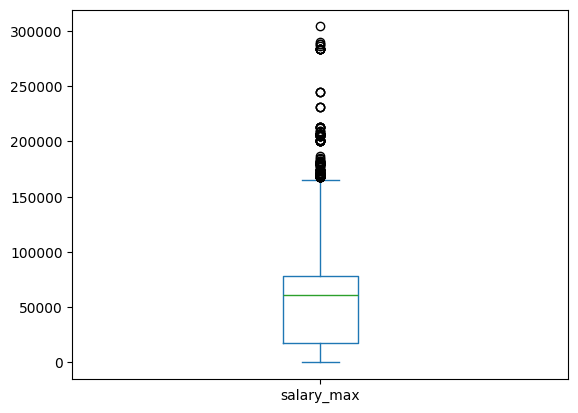

In [85]:
salary_filter['salary_max'].plot(kind='box')

#### Plotting `salary_min` where the outliers dropping

<Axes: >

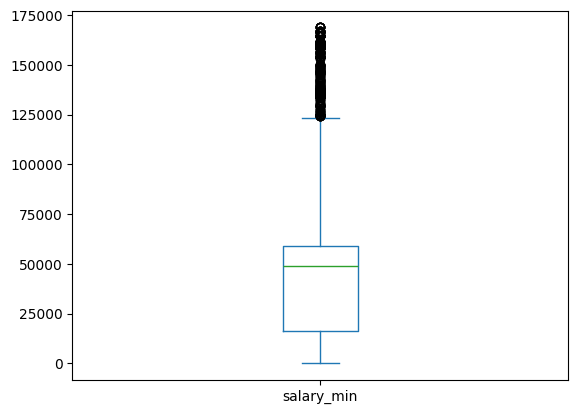

In [86]:
salary_filter['salary_min'].plot(kind='box')

####  Not handling Ouliers data['salary_min']

<Axes: >

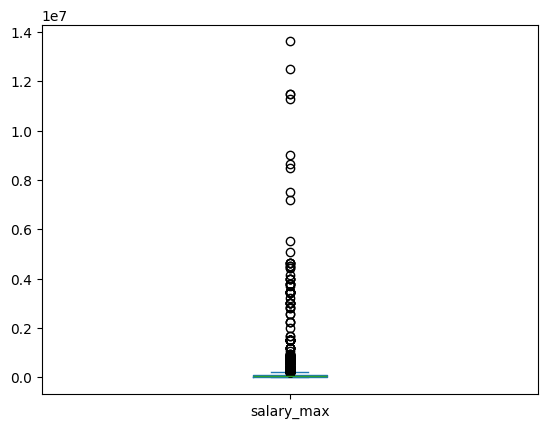

In [87]:
salary_filled['salary_max'].plot(kind='box')

####  Not handling Ouliers data['salary_min']

<Axes: >

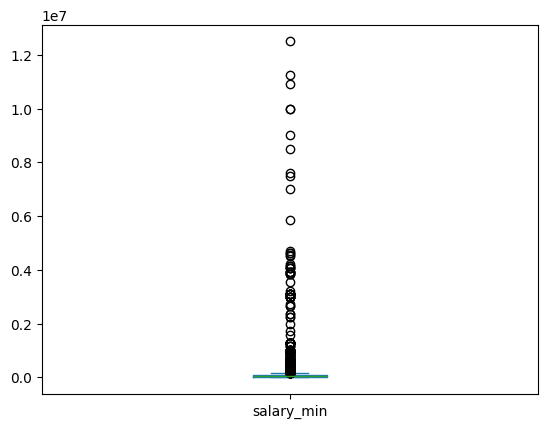

In [88]:
salary_filled['salary_min'].plot(kind='box')

### `Normalizing Data`


In [89]:
from sklearn.preprocessing import MinMaxScaler

scaller = MinMaxScaler()

salary_filled[['salary_min']] = scaller.fit_transform(salary_filled[['salary_min']])


print(salary_filled[['salary_min']])

        salary_min
31    3.440000e-06
33    2.395680e-01
70    8.000000e-08
105   4.240000e-06
129   7.280000e-06
...            ...
9914  3.179240e-04
9915  1.569616e-04
9916  3.902847e-03
9917  7.844780e-03
9918  3.902847e-03

[9919 rows x 1 columns]


In [90]:
from sklearn.preprocessing import MinMaxScaler

scaller = MinMaxScaler()

salary_filled[['salary_max']] = scaller.fit_transform(
    salary_filled[['salary_max']])


print(salary_filled[['salary_max']])

      salary_max
31      0.000002
33      0.219867
70      0.000048
105     0.000003
129     0.000006
...          ...
9914    0.000569
9915    0.000467
9916    0.004676
9917    0.008215
9918    0.004676

[9919 rows x 1 columns]


# Drop `Salary` in the dataframe

In [91]:
job_posting.drop('Salary', axis=1, inplace = True)

# Before drop missing values 


In [92]:
null_values = job_posting.isnull().sum().sum()
not_null_values = job_posting.notnull().sum().sum()
total_data = job_posting.size
total_missing = job_posting.isnull().sum().sum()

percentage = (total_missing / total_data) * 100

print(f'Null values in data\t: {null_values}')
print(f'Not null values in data\t: {not_null_values}')
print(f'Dimension of Data\t: {total_data}')
print(f'Percentage missing values : {percentage:.2f}%')

Null values in data	: 244571
Not null values in data	: 24394147
Dimension of Data	: 24638718
Percentage missing values : 0.99%


# Drop missing value in the data

In [93]:
job_posting.dropna(inplace=True)

# Data after cleaning missing values

In [94]:
null_values = job_posting.isnull().sum().sum()
not_null_values = job_posting.notnull().sum().sum()
total_data = job_posting.size
total_missing = job_posting.isnull().sum().sum()

percentage = (total_missing / total_data) * 100

print(f'Null values in data\t: {null_values}')
print(f'Not null values in data\t: {not_null_values}')
print(f'Dimension of Data\t: {total_data}')
print(f'Percentage missing values : {percentage:.2f}%')



Null values in data	: 0
Not null values in data	: 22684350
Dimension of Data	: 22684350
Percentage missing values : 0.00%


In [95]:
job_posting.info()

<class 'pandas.core.frame.DataFrame'>
Index: 872475 entries, 0 to 947642
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype              
---  ------                 --------------   -----              
 0   Website Domain         872475 non-null  object             
 1   Job Opening Title      872475 non-null  object             
 2   Job Opening URL        872475 non-null  object             
 3   First Seen At          872475 non-null  datetime64[ns, UTC]
 4   Last Seen At           872475 non-null  datetime64[ns, UTC]
 5   Location               872475 non-null  object             
 6   Category               872475 non-null  object             
 7   Seniority              872475 non-null  object             
 8   Keywords               872475 non-null  object             
 9   Description            872475 non-null  object             
 10  Contract Types         872475 non-null  object             
 11  Job Status             872475 non-null  obje